In [125]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv(f,header = False,skip = 1):
    F = open(f,"r")
    out = []
    n = -1
    for l in F:
        n += 1
        if n%skip == 0:
            temp = l.split(",")
            if header and n == 0:
                continue#out.append([t.split("\n")[0] for t in temp])
            else:
                out.append([float(t.split("\n")[0]) for t in temp])

        
    out = np.array(out)[:1000*int(len(out)/1000)]
    print(out.shape)
    return out

In [126]:
true_data_loc = "/srv/data/data0/takafumi/data/tc-gan/ssn/bptt_wgan/t012/7"
GAN_data_loc = "/srv/data/data0/takafumi/data/tc-gan/ssn/bptt_wgan/t012/7"
MM_data_loc = "/srv/data/data0/takafumi/data/tc-gan/ssn/bptt_moments/t000/9/"

true_data = 
GAN_data = 
MM_data = 

(1999000, 27)


In [127]:
print(test_data.shape)
print(model_output.shape)

(258, 27)
(1999, 1000, 27)


In [132]:
from scipy.stats import ks_2samp as KS
from sklearn import linear_model

#things to define: r-squared, complexity, sparsity

def maxrate(tc):
    return np.max(tc)

def SI(tc):
    return 1. - (tc[-1]/np.max(tc))

def prefBW(tc):
    return np.argmax(tc)
   
    
def partic(tc):
    partic = len(tc)*np.sum([x*x for x in tc])
    
    
def IPR(tc):
    return 1./partic(tc/np.sum(tc))

In [129]:
test_mr = [maxrate(t) for t in true_data]
GAN_mr = [[maxrate(t) for t in m] for m in GAN_data]
MM_mr = [[maxrate(t) for t in m] for m in MM_data]

KSmr = [KS(test_mr,m)[0] for m in GAN_mr]

test_si = [SI(t) for t in true_data]
GAN_si = [[SI(t) for t in m] for m in GAN_data]
MM_si = [[SI(t) for t in m] for m in MM_data]

KSsi = [KS(test_si,m)[0] for m in GAN_si]

test_bw = [prefBW(t) for t in true_data]
GAN_bw = [[prefBW(t) for t in m] for m in GAN_data]
MM_bw = [[prefBW(t) for t in m] for m in MM_data]

KSbw = [KS(test_bw,m)[0] for m in GAN_bw]

test_ipr = [IPR(t) for t in true_data]
GAN_ipr = [[IPR(t) for t in m] for m in GAN_data]
MM_ipr = [[IPR(t) for t in m] for m in MM_data]

KSipr = [KS(test_ipr,m)[0] for m in GAN_ipr]

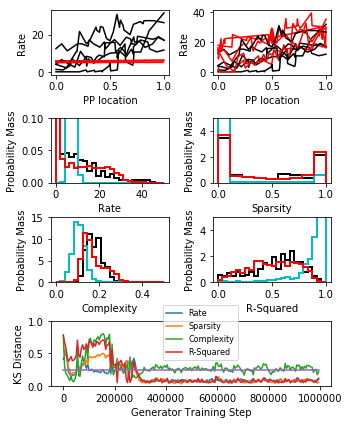

In [131]:
plt.clf()

fig = plt.figure(figsize = (5,6))
#ax = fig.add_axes([0,0,1,1])

ax1 = fig.add_axes([.15,.08,.78,.15])

ax2 = fig.add_axes([.15,.32,.33,.15])
ax3 = fig.add_axes([.6,.32,.33,.15])
ax4 = fig.add_axes([.15,.55,.33,.15])
ax5 = fig.add_axes([.6,.55,.33,.15])

ax6 = fig.add_axes([.15,.8,.33,.15])
ax7 = fig.add_axes([.6,.8,.33,.15])

gs = [500 * s * sk for s in range(len(KSR))]

ax1.plot(gs,KSmr,label = "Max Rate")
ax1.plot(gs,KSsi,label = "Suppression Index")
ax1.plot(gs,KSbw,label = "Pref. Size")
ax1.plot(gs,KSipr,label = "Inv. Partic. Ratio")
ax1.plot([gs[0],gs[-1]],[.25,.25])
ax1.set_xlabel("Generator Training Step")
ax1.set_ylabel("KS Distance")
ax1.set_ylim([0,1])
ax1.legend(loc = [.4,.4],fontsize = 8)

norm = True
nbin = 25

ax2.hist(test_mr,np.linspace(0,.5,nbin),histtype = "step",normed = norm,color = "k",linewidth = 2)
ax2.hist(GAN_mr[0],np.linspace(0,.5,nbin),histtype = "step",normed = norm,color = "c",linewidth = 2)
ax2.hist(GAN_mr[-1],np.linspace(0,.5,nbin),histtype = "step",normed = norm,color = "r",linewidth = 2)
ax2.hist(MM_mr[-1],np.linspace(0,.5,nbin),histtype = "step",normed = norm,color = "g",linewidth = 2)
ax2.set_xlabel("Max Rate")
ax2.set_ylabel("Probability Mass")
ax2.set_ylim([0,15])

ax3.hist(test_SI,np.linspace(0,1,nbin),histtype = "step",normed = norm,color = "k",linewidth = 2)
ax3.hist(GAN_SI[0],np.linspace(0,1,nbin),histtype = "step",normed = norm,color = "c",linewidth = 2)
ax3.hist(GAN_SI[-1],np.linspace(0,1,nbin),histtype = "step",normed = norm,color = "r",linewidth = 2)
ax3.hist(MM_SI[-1],np.linspace(0,1,nbin),histtype = "step",normed = norm,color = "g",linewidth = 2)
ax3.set_xlabel("Suppression Index")
ax3.set_ylabel("Probability Mass")
ax3.set_ylim([0,5])

ax4.hist(test_bw,np.linspace(0,50,nbin),histtype = "step",normed = norm,color = "k",linewidth = 2)
ax4.hist(GAN_bw[0],np.linspace(0,50,nbin),histtype = "step",normed = norm,color = "c",linewidth = 2)
ax4.hist(GAN_bw[-1],np.linspace(0,50,nbin),histtype = "step",normed = norm,color = "r",linewidth = 2)
ax4.hist(MM_bw[-1],np.linspace(0,50,nbin),histtype = "step",normed = norm,color = "g",linewidth = 2)
ax4.set_xlabel("Preferred Size")
ax4.set_ylabel("Probability Mass")
ax4.set_ylim([0,.1])

ax5.hist(test_ipr,np.linspace(0,1,10),histtype = "step",normed = norm,color = "k",linewidth = 2)
ax5.hist(GAN_ipr[0],np.linspace(0,1,10),histtype = "step",normed = norm,color = "c",linewidth = 2)
ax5.hist(GAN_ipr[-1],np.linspace(0,1,10),histtype = "step",normed = norm,color = "r",linewidth = 2)
ax5.hist(MM_ipr[-1],np.linspace(0,1,10),histtype = "step",normed = norm,color = "g",linewidth = 2)
ax5.set_xlabel("Inverse Participation Ratio")
ax5.set_ylabel("Probability Mass")
ax5.set_ylim([0,5])

for k in range(5):
    ax7.plot(test_data[k],"k")
    ax7.plot(GAN_data[0][k],"r")
    ax7.set_xlabel("Size")
    ax7.set_ylabel("Rate")

for k in range(5):
    ax6.plot(test_data[k],"k")
    ax6.plot(GAN_data[-1][k],"r")
    ax6.set_xlabel("Size")
    ax6.set_ylabel("Rate")

plt.show()
#plt.savefig("./Fig3_pythonversion.pdf")